In [1]:
import tqdm
import numpy as np

import torch
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

from mnist_loader import MNISTDataset, train_test_split
from autoencoders import (
    SimpleEncoder, 
    SimpleDecoder, 
    DeepEncoder,
    DeepDecoder,
    AutoEncoder
)
from functions import train_model

import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
torch.random.manual_seed(42)

LATENT_DIM = 20

In [3]:
mnist = datasets.MNIST('/home/andrei/datasets') 
# use data and targets only, supports __getitem__, 60000 images 28x28 px

In [4]:
train, test, plot_idx, labels = train_test_split(train_ratio=0.8, mnist=mnist)

In [5]:
image_transforms = transforms.ToTensor()
trainset = MNISTDataset(train, mnist, image_transforms)
testset = MNISTDataset(test, mnist, image_transforms)

In [6]:
trainloader = DataLoader(trainset, shuffle=True, batch_size=128, num_workers=2)
testloader = DataLoader(testset, shuffle=False, batch_size=128, num_workers=2)

In [7]:
encoder = SimpleEncoder(num_features=LATENT_DIM)
decoder = SimpleDecoder(num_features=LATENT_DIM)

model = AutoEncoder(encoder, decoder)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.BCELoss()

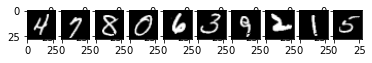

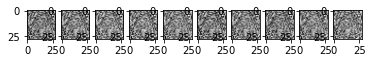

test loss: 65.31006413698196
 Epoch 0, train loss: 107.0165093690157, test loss: 19.267035454511642


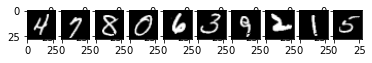

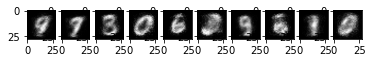

 Epoch 1, train loss: 69.6355040371418, test loss: 15.936018601059914


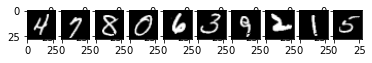

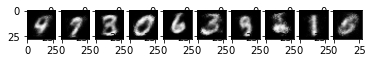

 Epoch 2, train loss: 60.84069183468819, test loss: 14.527517050504684


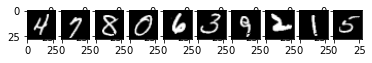

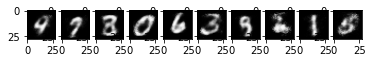

 Epoch 3, train loss: 56.706561639904976, test loss: 13.80992916226387
 Epoch 4, train loss: 54.52553831040859, test loss: 13.398062512278557


In [ ]:
model, optimizer = train_model(
    model=model,
    optimizer=optimizer,
    image_transforms=image_transforms,
    loss_fn=loss_fn,
    mnist=mnist,
    trainloader=trainloader,
    testloader=testloader,
    plot_idx=plot_idx
)

In [ ]:
encoder = DeepEncoder(num_features=LATENT_DIM)
decoder = DeepDecoder(num_features=LATENT_DIM)

model = AutoEncoder(encoder, decoder)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.BCELoss()

In [ ]:
model, optimizer = train_model(
    model=model,
    optimizer=optimizer,
    image_transforms=image_transforms,
    loss_fn=loss_fn,
    mnist=mnist,
    trainloader=trainloader,
    testloader=testloader,
    plot_idx=plot_idx
)